# *Exercise 4*

In this exercise, we are asked to compute the total internal energy per particle ,$\frac{E}{N}$, the potential energy per particle, $\frac{U}{N}$, the kinetic energy per particle, $\frac{K}{N}$ , the temperature ,$T$, and the pressure, $P$, for a system of $N=108$ particles of Argon.

These particles interact with the Leonnard-Jones potential:
$$V(r)=4\epsilon[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^{6}]$$
where $\epsilon$ is the depth of the potential well, $\sigma$ is the distance at which the particle-particle potential is zero and $r$ is the distance between two particles.
We will use reduced units where:
 - $\sigma$ is the unit of lenght; 
 - $\epsilon$ is the unit of energy;
 - $m$ is the unit of mass.
 
For Argon their values are: $\sigma=0.34 nm,\frac{\epsilon}{k_B}=120 K, m=39.948$ amu.
Then the formula for the potential becomes:
$$V(r^*)=4[(\frac{1}{r^*})^{12}-(\frac{1}{r^*})^{6}]$$
where $r^*=\frac{r}{\sigma}$ is the reduced distance. 

The formula for the pressure in reduced units becomes:

$$ P = \rho  T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48 \left[ \left(\frac{1}{|\vec{r^*}_i -\vec{r^*}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{|\vec{r^*}_i -\vec{r^*}_j|}\right)^6 \right] \right\rangle $$


We are given the following conditions (in reduced units) to perform our MD simulations:
 1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
 2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
 3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)


# <font color="red"> Equilibrium <font color="black">


In the following plots, we have applied the $Data$ $Blocking$ method with
$J=100$ number of blocks and $L=1000$ number of steps in each block.

The MD algorithm uses a perfect crystalline configuration as the initial configuration.
At the inital step, the velocities of the particles are generated , with a dependence from the input temperature, to be uniformly distributed with total average equal to $0$.
These velocities are used to determine a $pseudo$-$previous$ configuration of the initial one:
$$\vec{x}_{old,i}={Pbc}(\vec{x}_i - \vec{v}_i    \cdot t)$$
where $i$ is the considered particle, $t$ is the time of a step and $Pbc$ are the periodic boundary conditions.
Then the Verlet algorithm can be started.
Since the perfect cristalline configuration is not stable at the considered temperatures, the system will evolve towards an equilibrium one.
Moreover, the temperature at each step is measured through the velocities of the particles, which are determined from the present step configuration and the previous step configuration, and there will be a non negligible change in the value of T.
Then it is necessary a different intial value of $T$ to obtain the wanted one at equilibrium.
- gas phase: $T_0=0.97$;
- liquid phase: $T_0=1.98$;
- solid phase: $T_0=1.541$



------------------------------------------------------------------



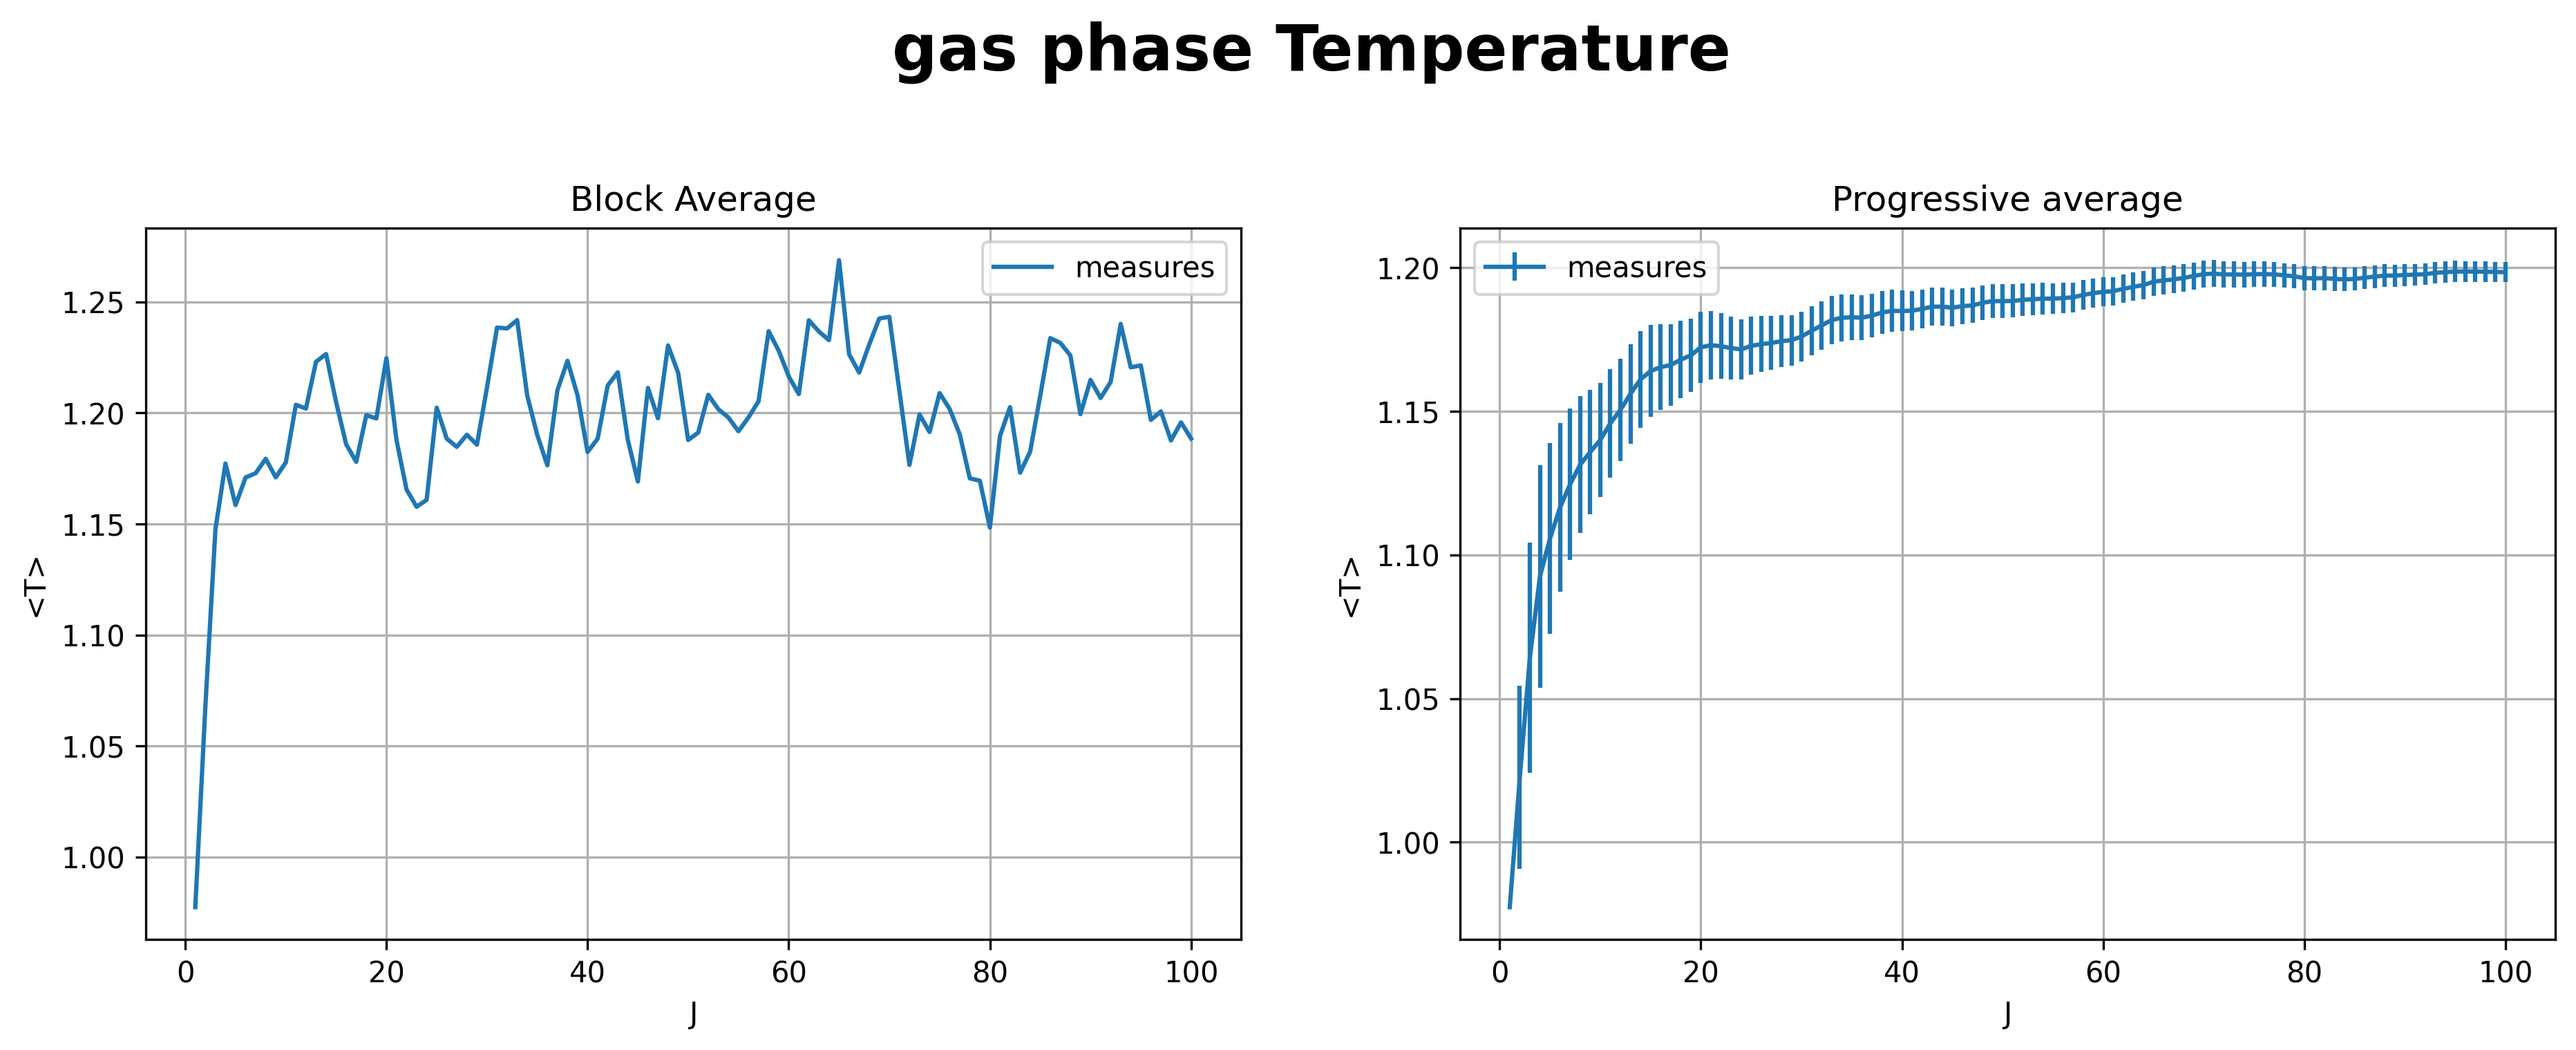

gas  phase : Temperature for J=100:  1.19845  +-  0.00350499

-----------------------------------------------------------------



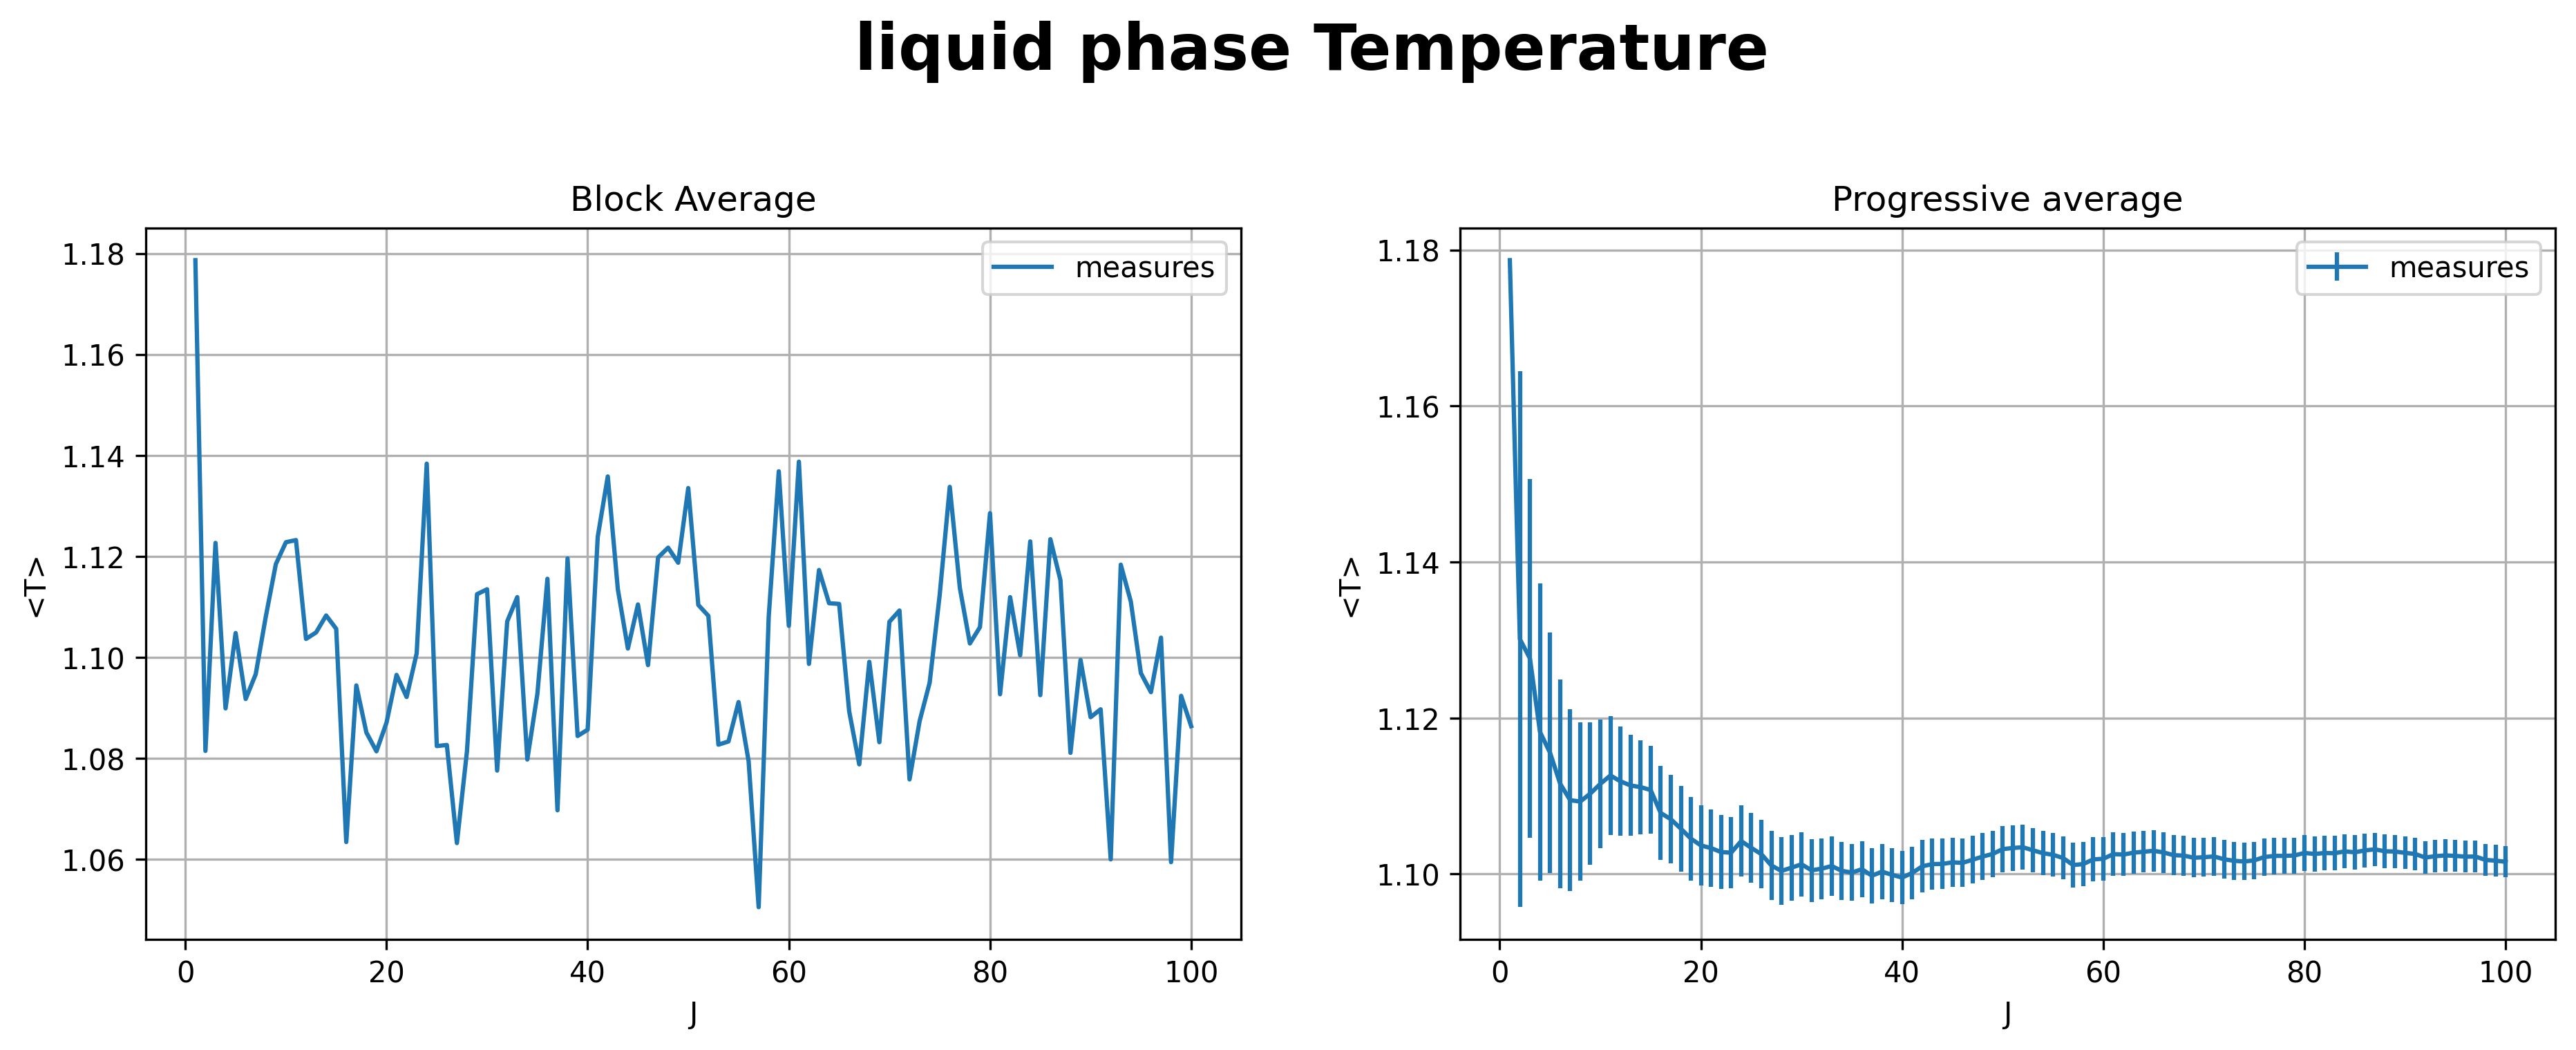

liquid  phase : Temperature for J=100:  1.10155  +-  0.00200105

-----------------------------------------------------------------



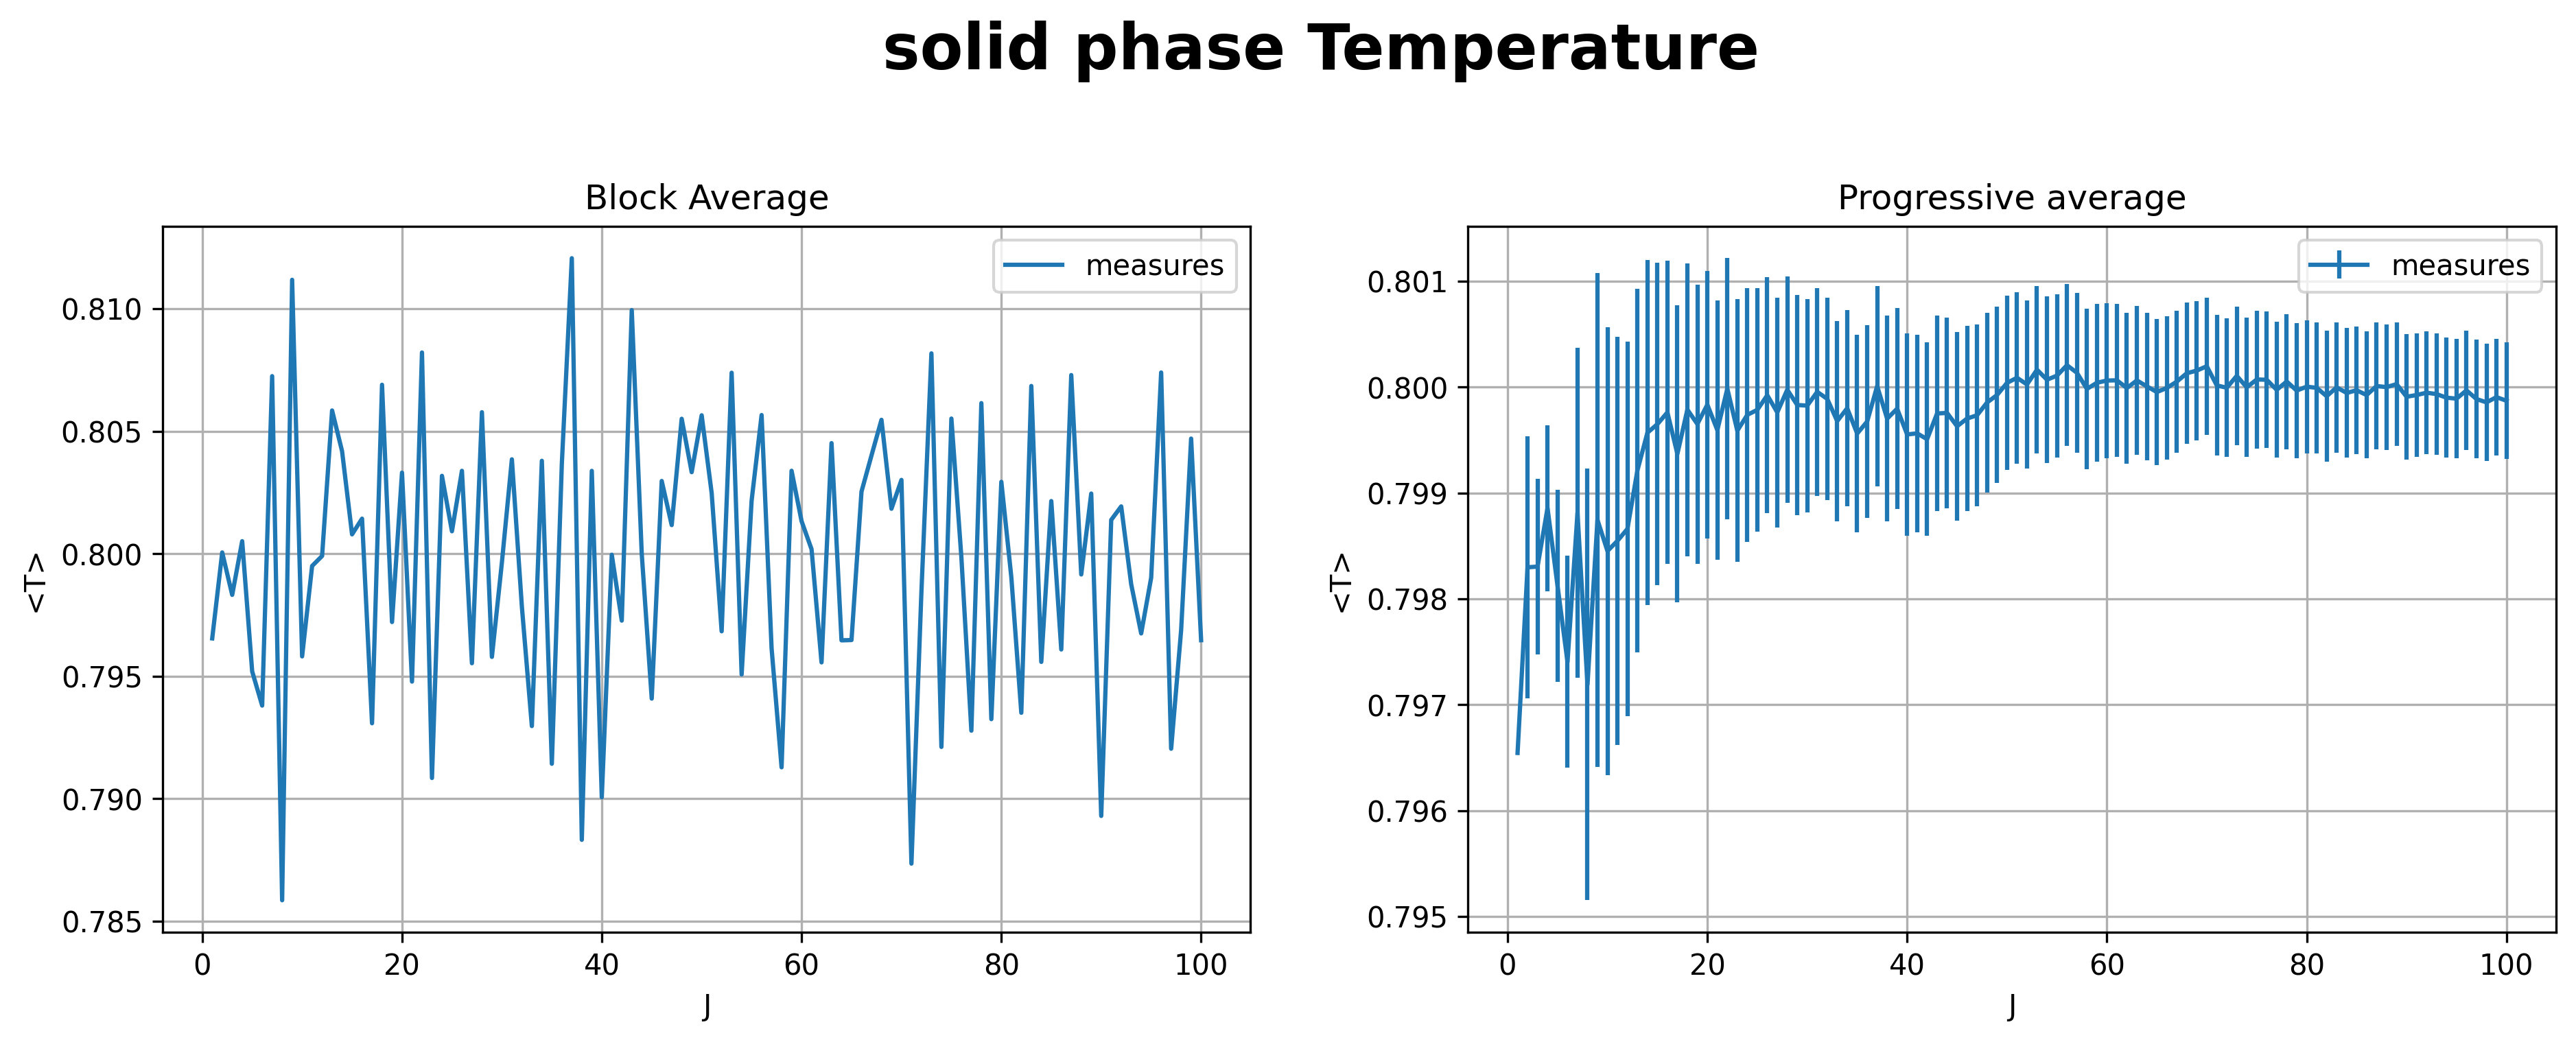

solid  phase : Temperature for J=100:  0.79987  +-  0.0005489

-----------------------------------------------------------------



In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string

folder=["gas","liquid","solid"]
print('\n------------------------------------------------------------------\n')

for i in folder:

    x , y, f, error = np.loadtxt("MDNVE_MCNVT/"+i+"NotEq/output_temp.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')
    fig=plt.figure(figsize=(15,10),dpi=300)
    plt.suptitle(i+" phase Temperature", weight="bold",size="22")
    
    plt.subplot(221)
    plt.plot(x,y,label = "measures")
    plt.xlabel('J')
    plt.ylabel('<T>')
    plt.grid(True)
    plt.legend()
    plt.title("Block Average")
    
    plt.subplot(222)
    plt.errorbar(x,f,yerr=error,label = "measures")
    plt.xlabel('J')
    plt.ylabel('<T>')
    plt.grid(True)
    plt.legend()
    plt.title("Progressive average")
    plt.show()
    
    
    print(i," phase : ""Temperature for J=100: ",f[99] ," +- ", error[99])
    print("\n-----------------------------------------------------------------\n")

From the block averages plots above, we can safely assume that an equilibrium is reached after 10000 steps for the gas phase, 10000 steps for the liquid phase and 10000 steps for the solid phase.

# Plots after equilibration




------------------------------------------------------------------

<T> for J=100:  1.20254  +-  0.00232922
<p> for J=100:  0.0505041  +-  0.000309315
<E/N> for J=100:  1.42211  +-  9.8385e-06
<U/N> for J=100:  -0.381704  +-  0.00349529
<K/N> for J=100:  1.80382  +-  0.00349383


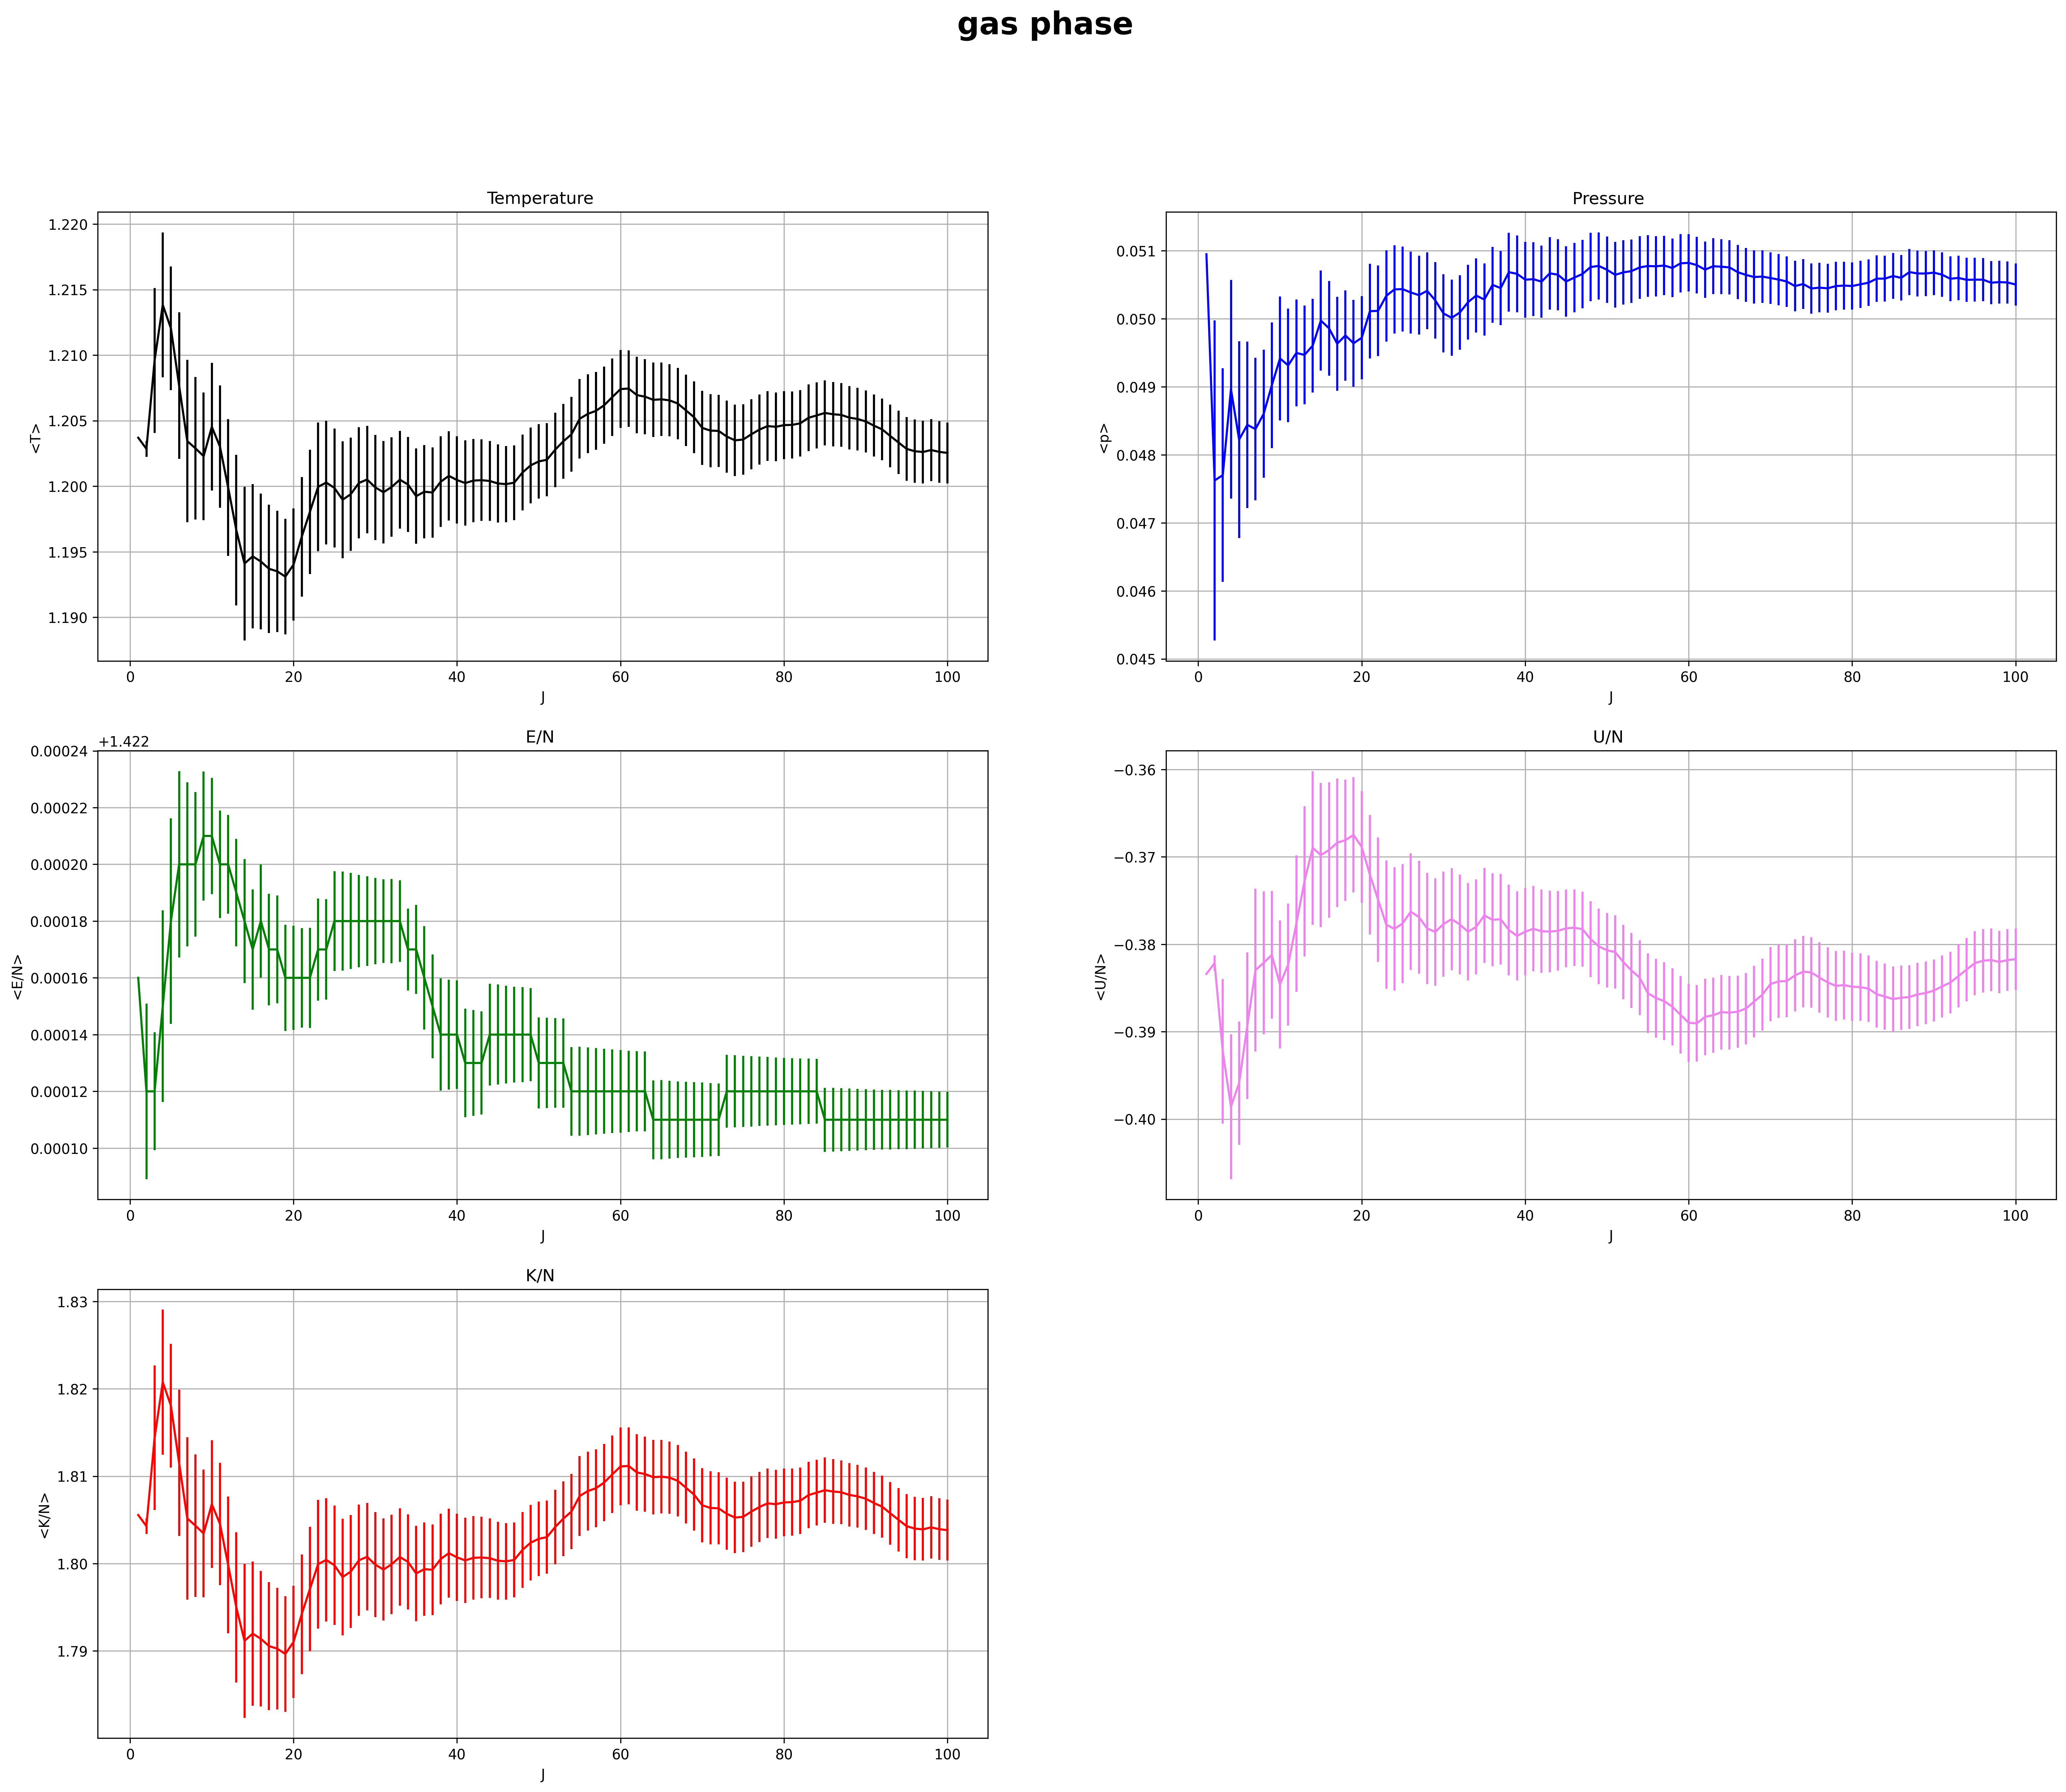


-----------------------------------------------------------------

<T> for J=100:  1.10029  +-  0.00191066
<p> for J=100:  2.10722  +-  0.0145715
<E/N> for J=100:  -3.37838  +-  0.000171771
<U/N> for J=100:  -5.02881  +-  0.00291538
<K/N> for J=100:  1.65044  +-  0.00286599


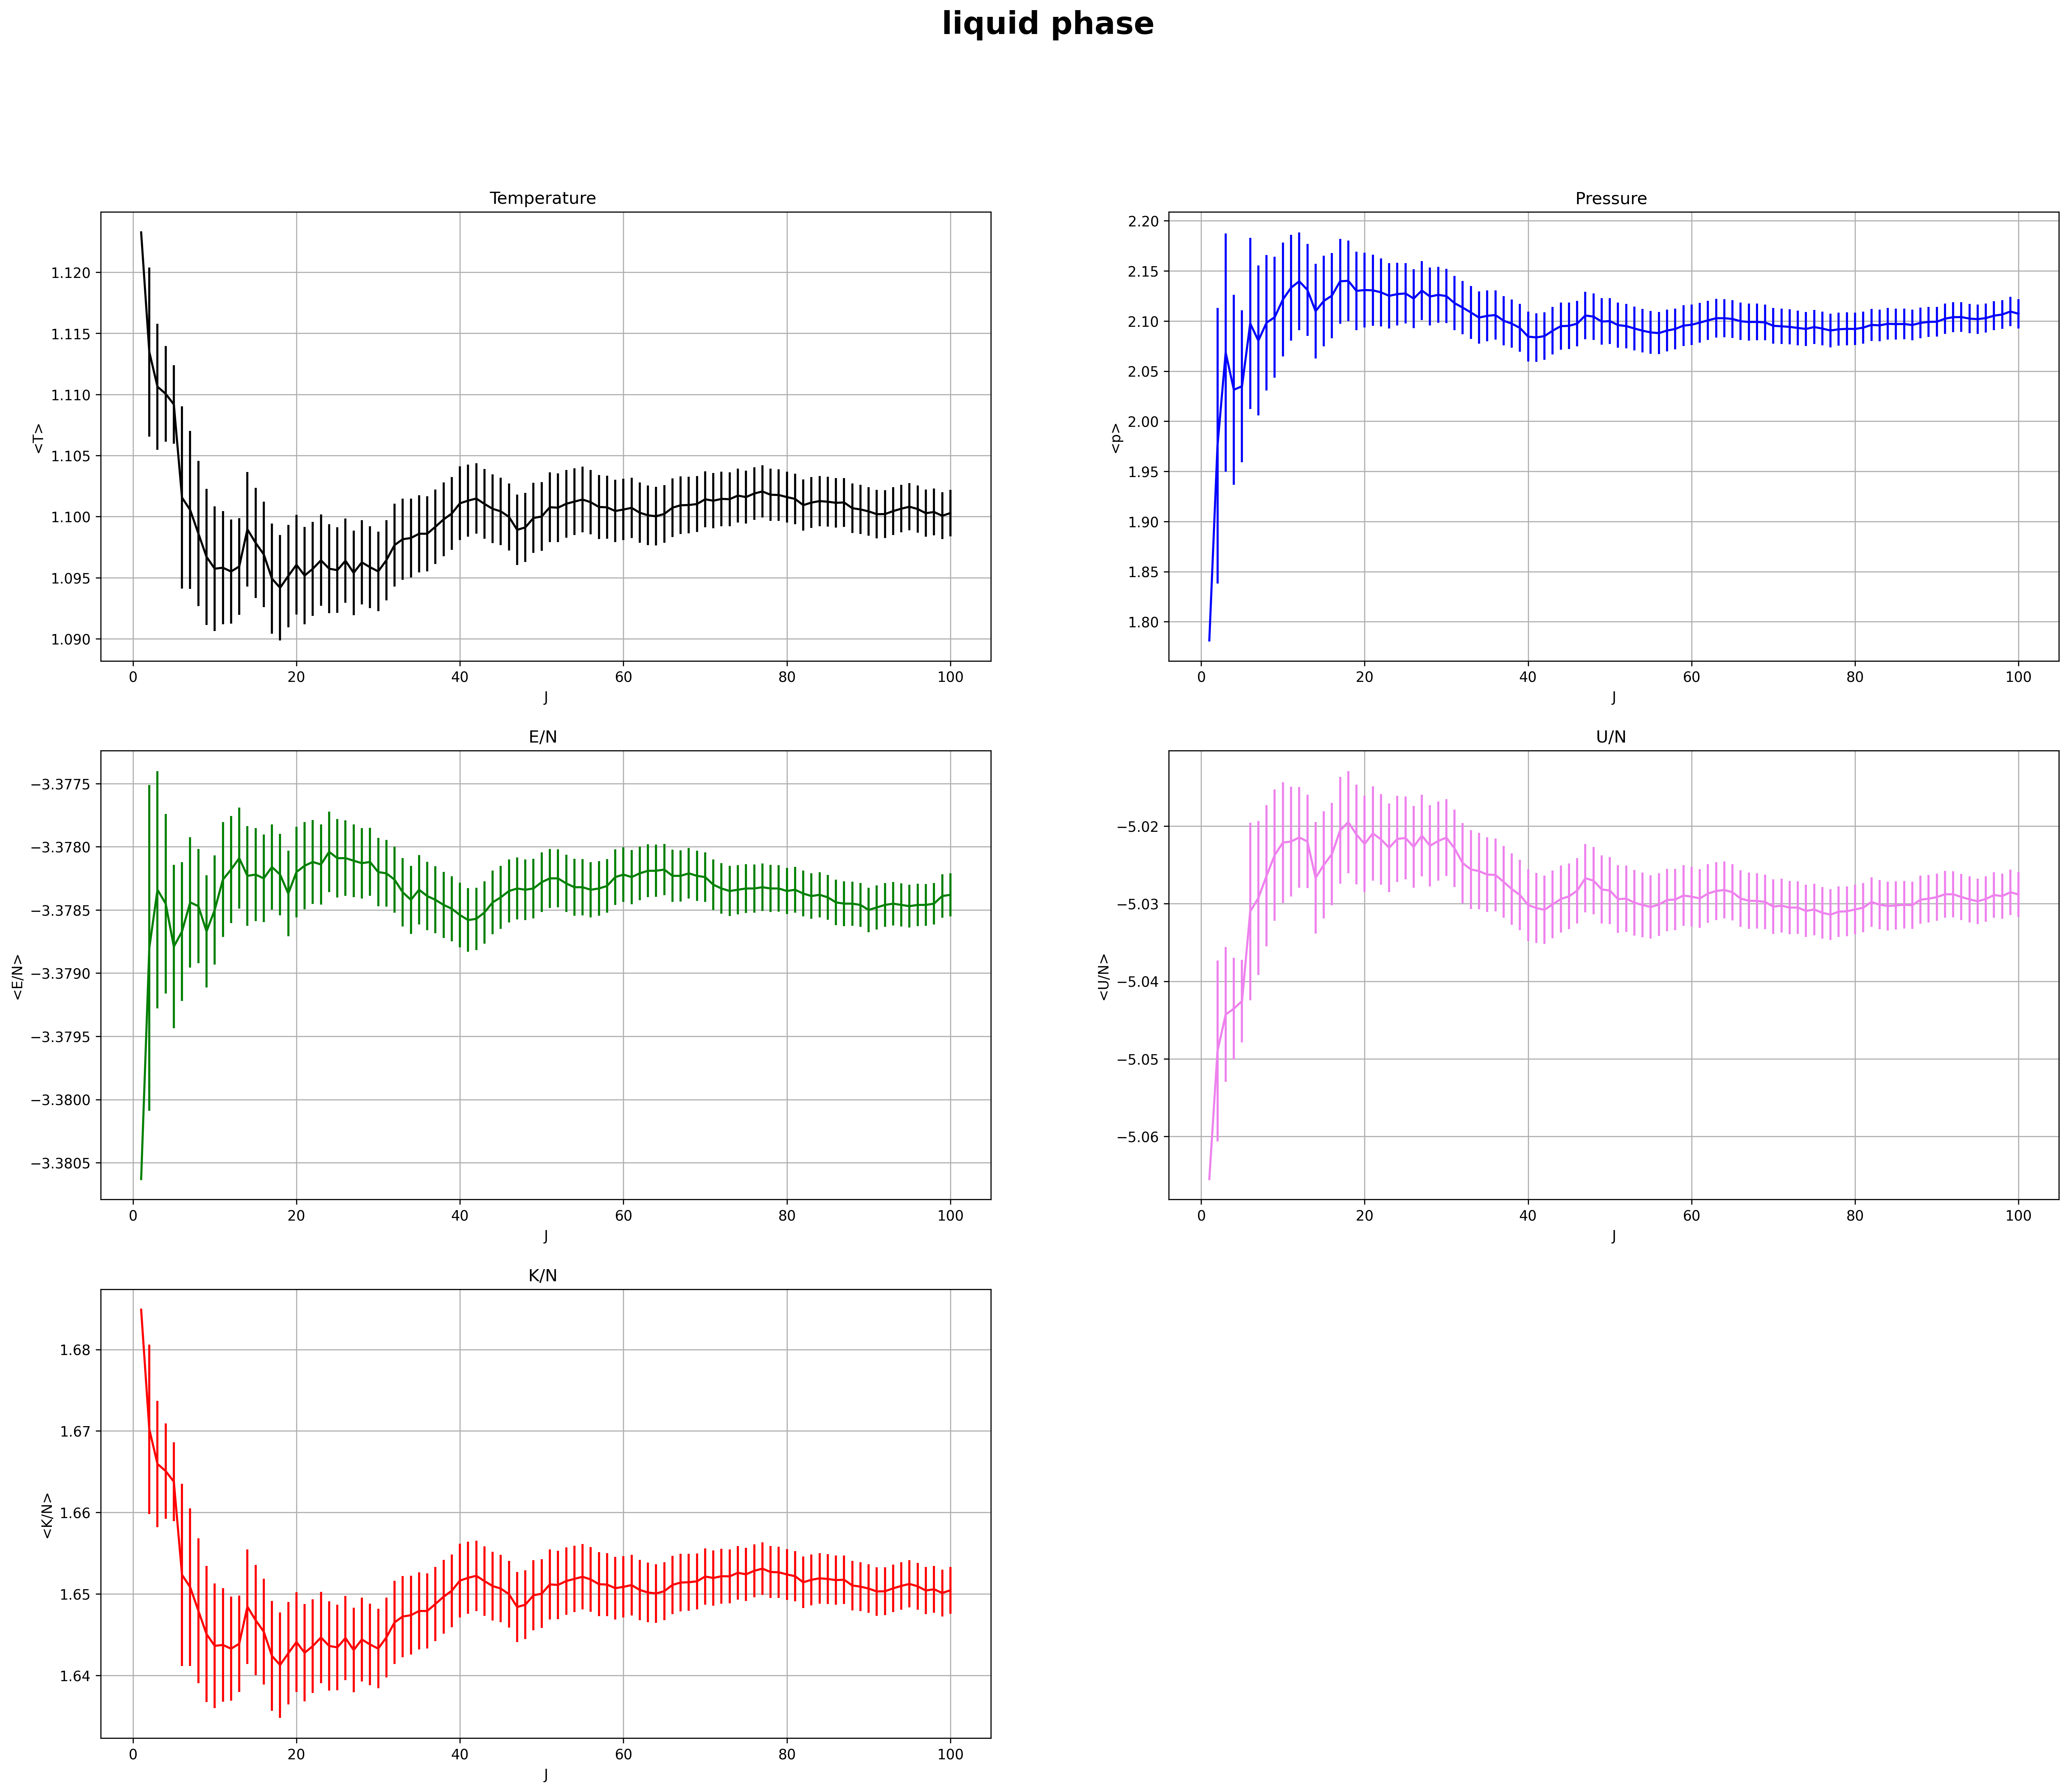


-----------------------------------------------------------------

<T> for J=100:  0.800025  +-  0.000534197
<p> for J=100:  9.60837  +-  0.00409451
<E/N> for J=100:  -5.46157  +-  7.05622e-05
<U/N> for J=100:  -6.66161  +-  0.000809728
<K/N> for J=100:  1.20004  +-  0.000801295


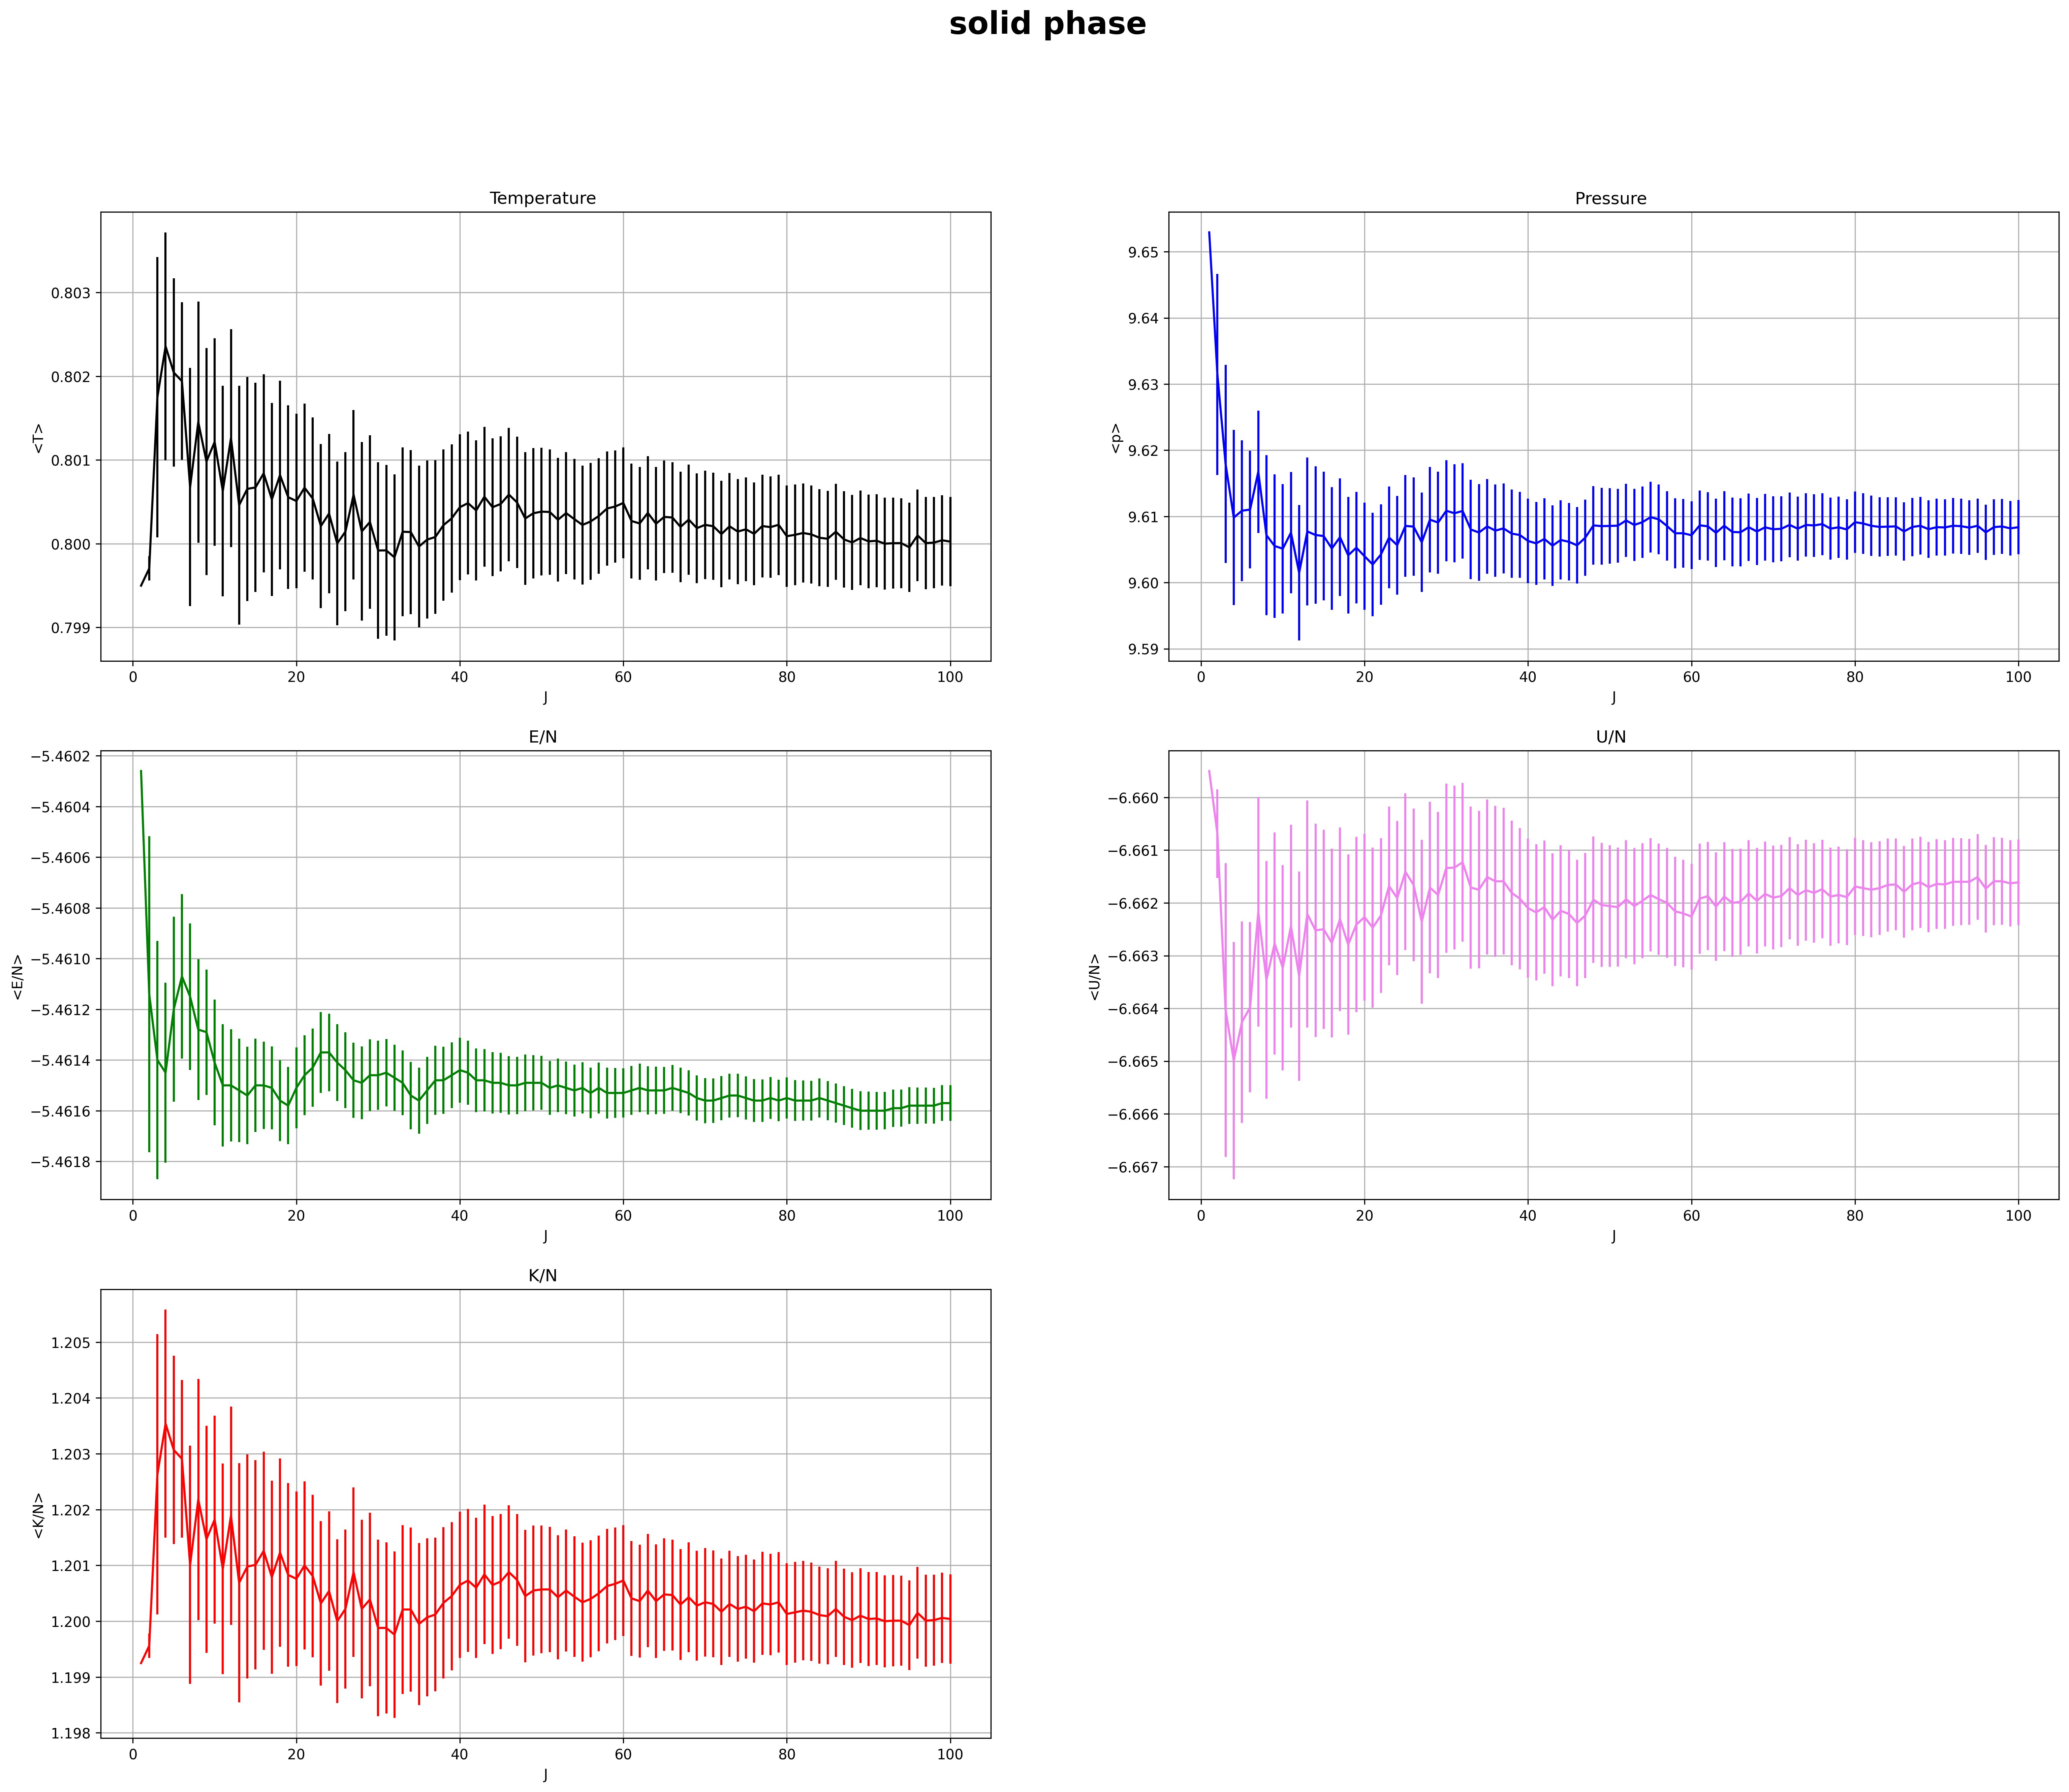


-----------------------------------------------------------------



In [31]:
folder=["gas","liquid","solid"]
file=["/output_temp.dat","/output_press.dat","/output_etot.dat","/output_epot.dat","/output_ekin.dat"]
Labels=['<T>','<p>','<E/N>','<U/N>','<K/N>']
Titles=["Temperature ","Pressure ","E/N ","U/N ","K/N "]
Colors=["black","blue","green","violet","red"]
print('\n------------------------------------------------------------------\n')
for i in folder:
    fig=plt.figure(figsize=(25,20),dpi=300)
    plt.suptitle(i+" phase\n", weight="bold",size="22")
    for j in file:
        
        plt.subplot(3,2,file.index(j)+1)
        x , y, f, error = np.loadtxt("MDNVE_MCNVT/"+i+j, usecols=(0,1,2,3), delimiter=' ', unpack='true')
        
        plt.errorbar(x,f,yerr=error,color=Colors[file.index(j)])
        plt.xlabel('J')
        plt.ylabel(Labels[file.index(j)])
        plt.grid(True)
        print(Labels[file.index(j)]+" for J=100: ",f[99] ," +- ", error[99])
        
        plt.title(Titles[file.index(j)])
    plt.show()
    print("\n-----------------------------------------------------------------\n")

# Energies/N 
By observing the previous plots, we notice that there is a variation in the value of $E/N$ during the simulation.

------------------------------------------------------------------


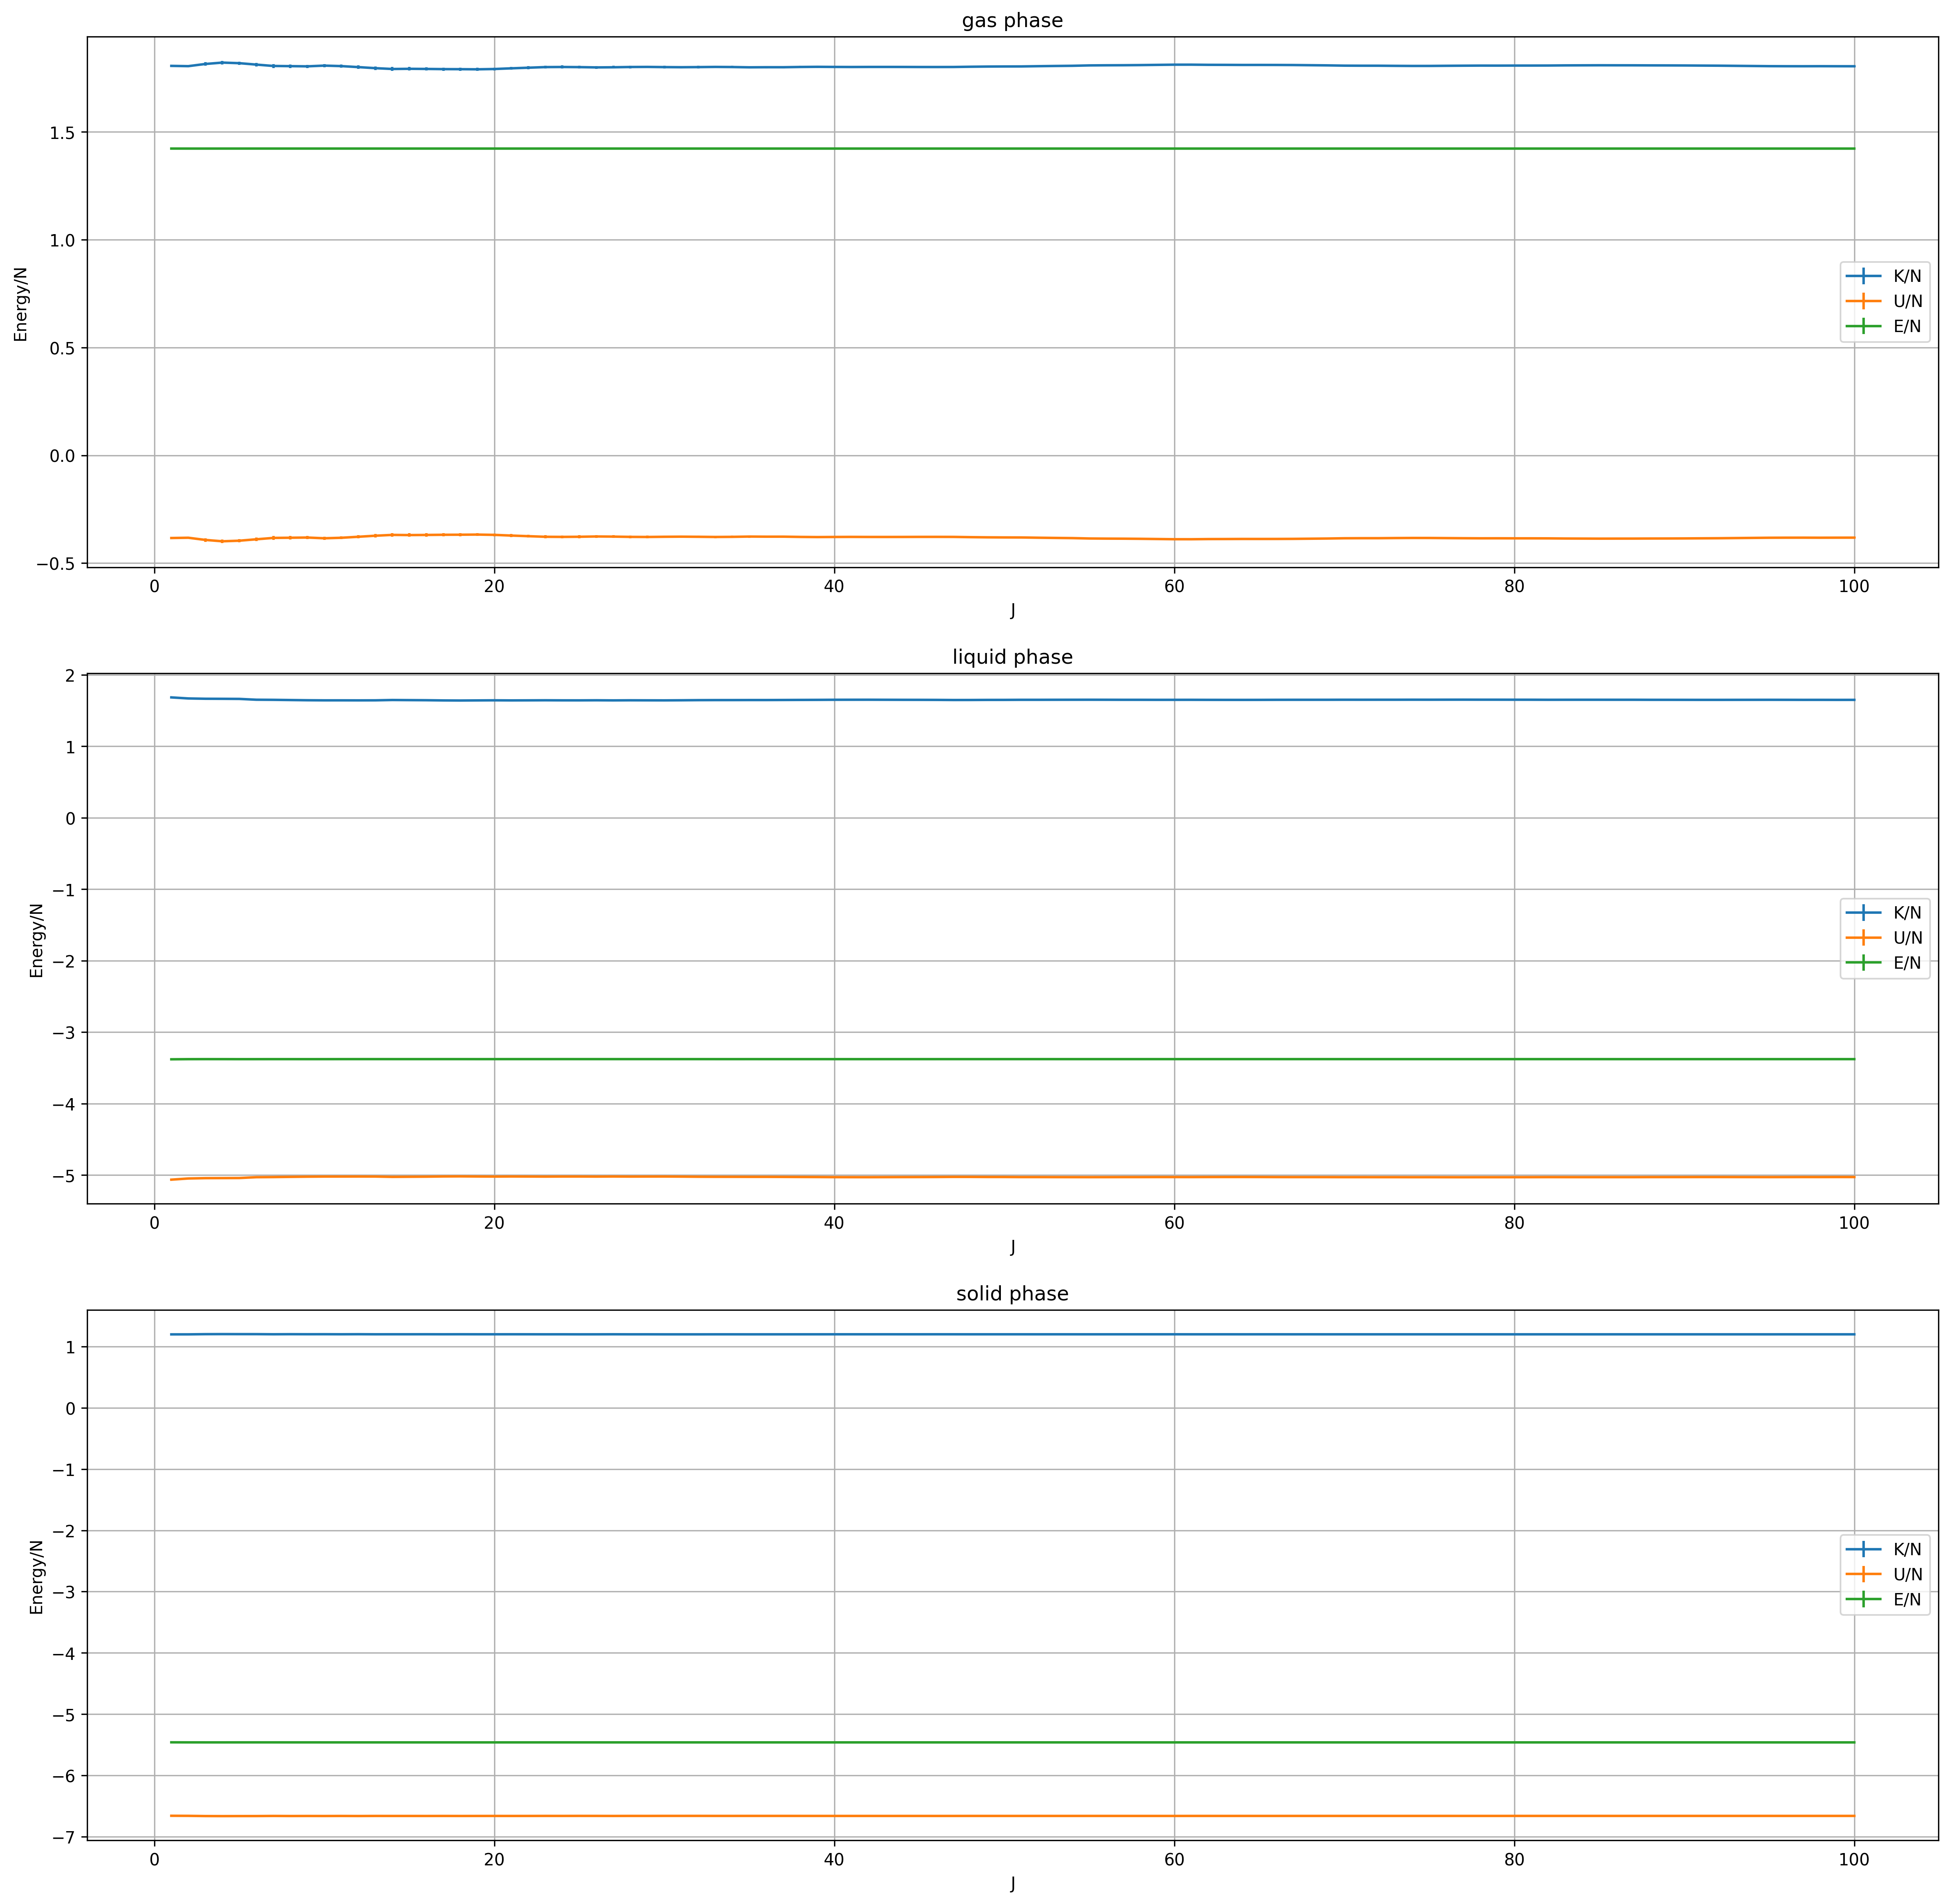

-----------------------------------------------------------------


In [33]:
print('------------------------------------------------------------------')

folder=['gas','liquid','solid']
file=["ekin","epot","etot"]
name=["K/N","U/N","E/N"]
fig=plt.figure(figsize=(20,20),dpi=300)
for i in folder:
    plt.subplot(3,1,folder.index(i)+1)
    plt.title(i+" phase")
    plt.xlabel('J')
    plt.ylabel('Energy/N')
    plt.grid(True)
    k=0
    for j in file:
        
        x , y, f, error = np.loadtxt("MDNVE_MCNVT/"+i+"/output_"+j+".dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')
        plt.errorbar(x,f,yerr=error,label = name[k])
        k=k+1
    plt.legend()    
plt.show()    
print("-----------------------------------------------------------------")


By plotting all three energies in the same figure, it is evident that, with respect to the variations in $U/N$ and $K/N$, the total energy per particle is well conserved during the simulation.